In [19]:
import pandas as pd

In [21]:
data = pd.read_csv('wind_turbine_energy_production.csv')
print(data.head())

         Date  Energy_Production
0  2010-01-31        2441.013086
1  2010-02-28        2032.159230
2  2010-03-31        2110.406223
3  2010-04-30        2362.479939
4  2010-05-31        2210.004783


In [23]:
#Convert Date and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

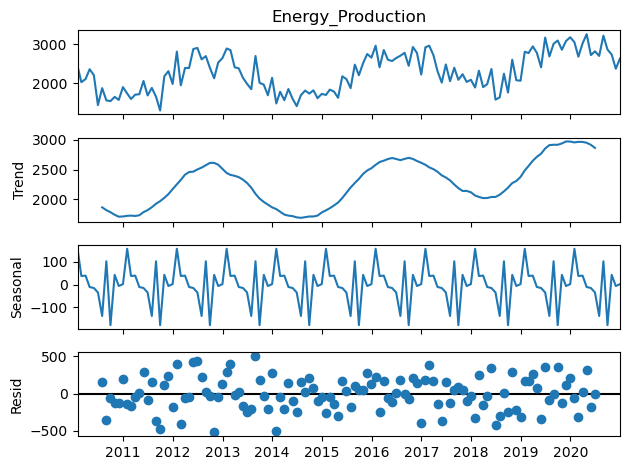

In [31]:
#Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#Decompose
decomp = seasonal_decompose (
    data['Energy_Production'], model='Additive', period=12
)

decomp_plot = decomp.plot()
plt.show()

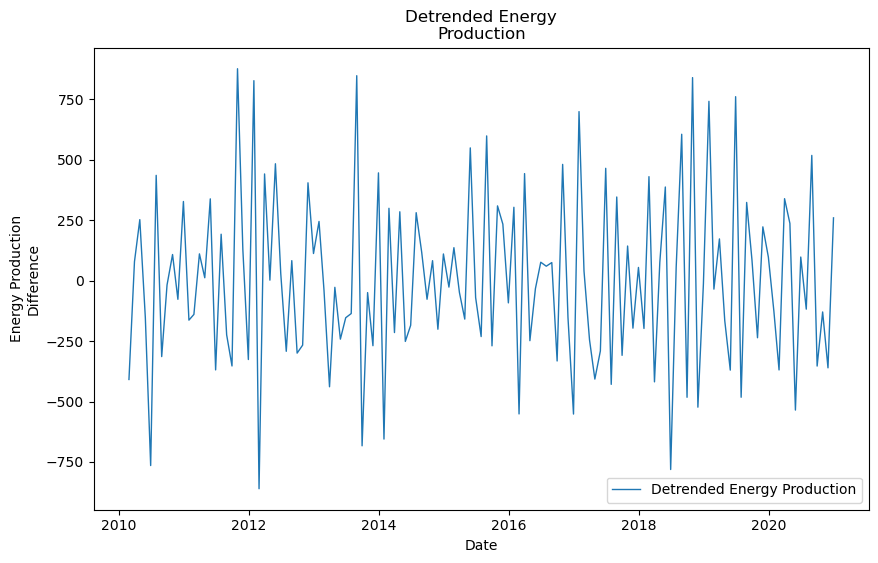

In [47]:
#Detrending the data
#Detrend by first difference
data['Energy_Production_Diff'] =(
    data['Energy_Production'].diff()
)

#Plot the detrended data
plt.figure(figsize=(10,6))
plt.plot( 
    data.index,
    data['Energy_Production_Diff'],
    label ='Detrended Energy Production',
    linewidth=1
)
plt.legend()
plt.title('Detrended Energy\nProduction')
plt.xlabel('Date')
plt.ylabel('Energy Production\nDifference')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13852\3607216786.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(data.index[-1], periods=12, freq='M'),


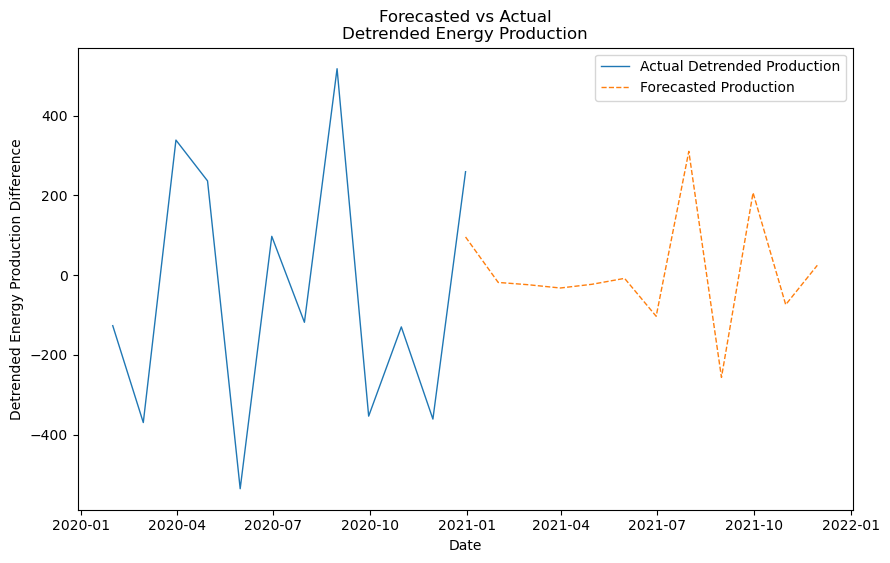

In [61]:
#Forecasting with SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Fit SARIMAX on the detrended data
model = SARIMAX(
    data['Energy_Production_Diff'].dropna(),
    order =(1, 1, 1),
    seasonal_order = (1, 1, 1, 12)
)
results = model.fit()

#Forecast the next 12 months 
forecast = results.forecast(steps=12)

#Plot Actual vs Forecasted Production
plt.figure(figsize = (10,6))
plt.plot (
    data['Energy_Production_Diff'][-12:],
    label ='Actual Detrended Production',
    linewidth = 1
)
plt.plot(
    pd.date_range(data.index[-1], periods=12, freq='M'),
    forecast,
    label= 'Forecasted Production',
    linestyle='--',
    linewidth=1
)
plt.legend()
plt.title(
    'Forecasted vs Actual\nDetrended Energy Production'
)
plt.xlabel('Date')
plt.ylabel('Detrended Energy Production Difference')
plt.show() 